### Name : Bannem Anatol Clement Junior

# Exercice 8 (Chapter 5)

In [1]:
# 8.a

set.seed(1)
x = rnorm(100)
y = x - 2 * x^2 + rnorm(100)

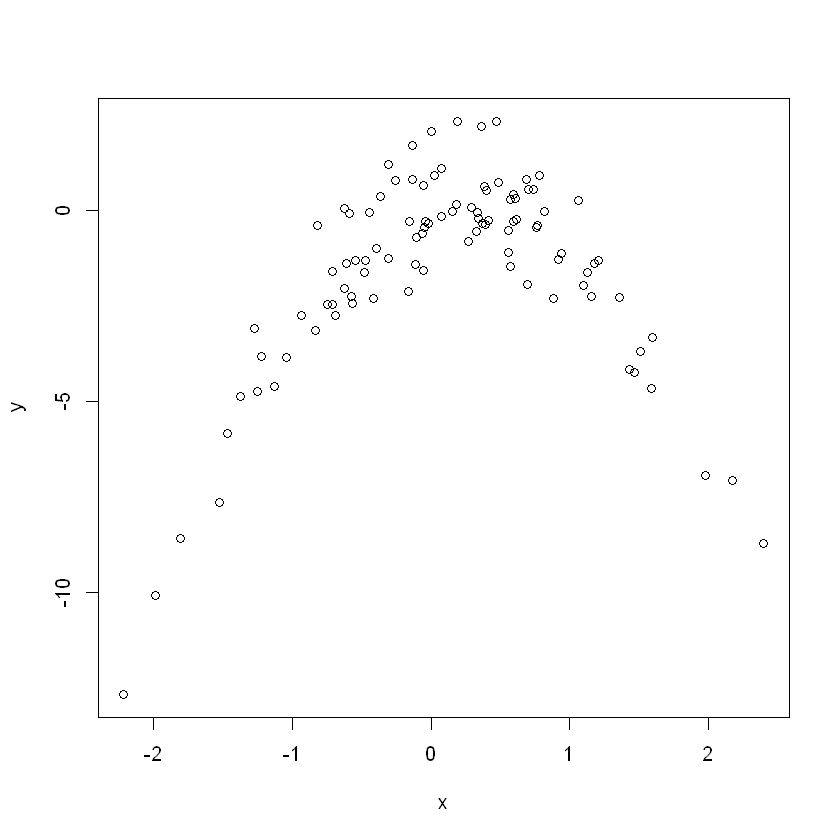

In [2]:
# 8.b

plot(x, y)

##### We can observe that on the x axis, the values are from -2 to 2 and on the y axis the values are from -8 to 2

In [3]:
# 8.c

library(boot)

In [4]:
Data = data.frame(x, y)
set.seed(1)

In [5]:
# i.
glm.fit = glm(y ~ x)
cv.glm(Data, glm.fit)$delta

[1] 7.288162 7.284744

In [6]:
# ii.
glm.fit = glm(y ~ poly(x, 2))
cv.glm(Data, glm.fit)$delta

[1] 0.9374236 0.9371789

In [7]:
# iii.
glm.fit = glm(y ~ poly(x, 3))
cv.glm(Data, glm.fit)$delta

[1] 0.9566218 0.9562538

In [8]:
# iv.
glm.fit = glm(y ~ poly(x, 4))
cv.glm(Data, glm.fit)$delta

[1] 0.9539049 0.9534453

In [9]:
# 8.f

summary(glm.fit)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


##### Fitting models show the statistical significance of linear and quadratic terms, which agrees with the conclusions drawn based on the cross validation results

# Exercice 1 (Chapter 6)

#### a

model that has the smallest training RSS is Best Subset. Because the other methods determine models with a path dependency.

#### b

Model that has the smallest test RSS is still Best Subset. Because it considers more models then the other methods

#### c

True
False
False
False
True

# Exercice 9 (Chapter 6)

In [28]:
# 9.a

# Load data

library(ISLR)
set.seed(1)
data(College)
# sum(is.na(College))

In [29]:
# Set to training and test set

trainid <- sample(1:nrow(College), nrow(College)/2)
train <- College[trainid,]
test <- College[-trainid,]
str(College)

'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

In [30]:
# 9.b

# fitting linear model using least squares
fit.lm <- lm(Apps~., data=train)
pred.lm <- predict(fit.lm, test)
(err.lm <- mean((test$Apps - pred.lm)^2))  # test error

[1] 1135758

In [14]:
# 9.c

library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.6.2"Loaded glmnet 2.0-16



In [37]:
# Fitting the ridge regression model on the training set

xmat.train <- model.matrix(Apps~., data=train)[,-1]
xmat.test <- model.matrix(Apps~., data=test)[,-1]
fit.ridge <- cv.glmnet(xmat.train, train$Apps, alpha=0)
(lambda <- fit.ridge$lambda.min)

[1] 445.4093

In [38]:
pred.ridge <- predict(fit.ridge, s=lambda, newx=xmat.test)
(err.ridge <- mean((test$Apps - pred.ridge)^2))  # test error

[1] 981782.5

#### Test RSS is higher than OLS 981782.46

In [40]:
# 9.d

require(glmnet)
xmat.train <- model.matrix(Apps~., data=train)[,-1]
xmat.test <- model.matrix(Apps~., data=test)[,-1]
fit.lasso <- cv.glmnet(xmat.train, train$Apps, alpha=1)
(lambda <- fit.lasso$lambda.min)  # optimal lambda

[1] 2.377015

In [46]:
pred.lasso <- predict(fit.lasso, s=lambda, newx=xmat.test)
(err.lasso <- mean((test$Apps - pred.lasso)^2))  # test error
coef.lasso <- predict(fit.lasso, type="coefficients", s=lambda)[1:ncol(College),]

[1] 1113027

#### As we can see here, Test RSS is still higher than OLS 1113027.43

In [22]:
# 9.e

# Fit the PCR model with the cross-validation
install.packages("pls")

Installing package into 'C:/Users/abannem/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'pls' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abannem\AppData\Local\Temp\RtmpGoXndL\downloaded_packages


In [23]:
library(pls)

Warning message:
"package 'pls' was built under R version 3.6.2"
Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



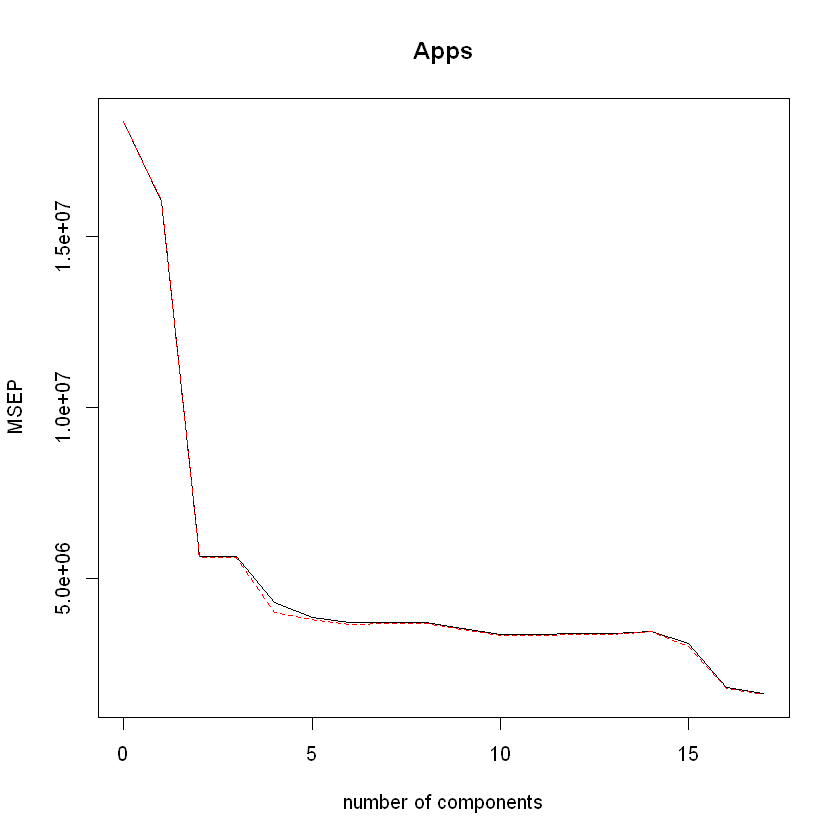

In [48]:
set.seed(1)
fit.pcr <- pcr(Apps~., data=train, scale=TRUE, validation="CV")
validationplot(fit.pcr, val.type="MSEP")

In [49]:
pred.pcr <- predict(fit.pcr, test, ncomp=16) # Minimum Cross validation set at M=16
(err.pcr <- mean((test$Apps - pred.pcr)^2))

[1] 1137877

#### Test RSS for PCR is about 1137876.86

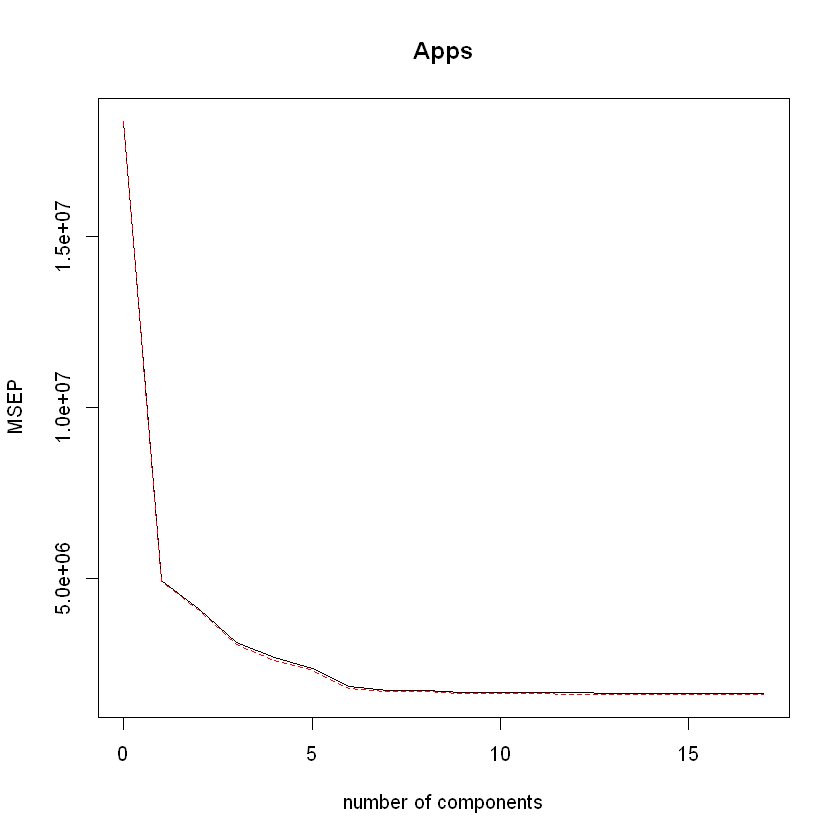

In [50]:
# 9.f

# Fit a PLS model on the training with a cross validation
set.seed(1)
fit.pls <- plsr(Apps~., data=train, scale=TRUE, validation="CV")
validationplot(fit.pls, val.type="MSEP")

In [52]:
pred.pls <- predict(fit.pls, test, ncomp=10)  # Minimum Cross validation set at M=16
(err.pls <- mean((test$Apps - pred.pls)^2))

[1] 1131661

#### Test RSS for PLS is about 1131660.82

# Exercise 9 - Chap 7 (Page 299)

In [1]:
# Load Data

require(MASS)
data(Boston)
set.seed(1)

Loading required package: MASS


#### 9.a

In [4]:
# Fit the cubic polynomial regression

fit.03 <- lm(nox~poly(dis,3), data=Boston)
summary(fit.03)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


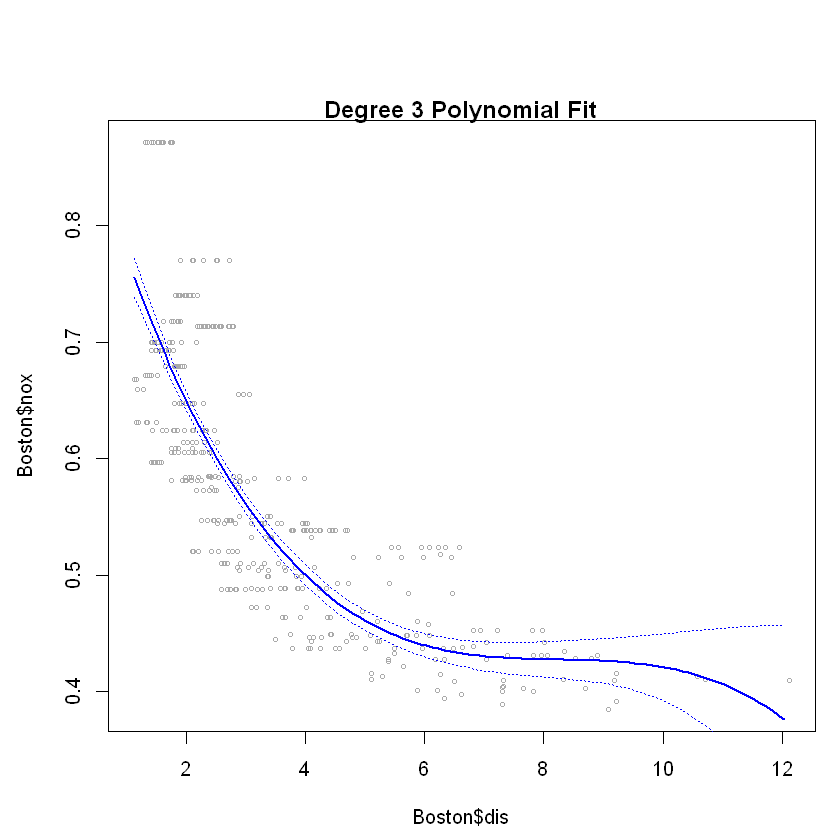

In [5]:
dislims <- range(Boston$dis)
dis.grid <- seq(dislims[1], dislims[2], 0.1)
preds <- predict(fit.03, newdata=list(dis=dis.grid), se=TRUE)
se.bands <- preds$fit + cbind(2*preds$se.fit, -2*preds$se.fit)
par(mfrow=c(1,1), mar=c(4.5,4.5,1,1), oma=c(0,0,4,0))
plot(Boston$dis, Boston$nox, xlim=dislims, cex=0.5, col="darkgrey")
title("Degree 3 Polynomial Fit")
lines(dis.grid, preds$fit, lwd=2, col="blue")
matlines(dis.grid, se.bands, lwd=1, col="blue", lty=3)

#### The Plot shows a smoothed curve fitting the data.

#### 9.b

In [7]:
all.rss = rep(NA, 10)
for (i in 1:10) {
    fit.03 = lm(nox ~ poly(dis, i), data = Boston)
    all.rss[i] = sum(fit.03$residuals^2)
}
all.rss

[1] 2.768563 2.035262 1.934107 1.932981 1.915290 1.878257 1.849484 1.835630
 [9] 1.833331 1.832171

#### As we can see, we expected the train RSS to decreases with degree of polynomial and it does.

#### 9.c

In [8]:
require (boot)

Loading required package: boot


[1] 0.005558263 0.004085706 0.003876521 0.003863342 0.004237452 0.005686862
 [7] 0.010278897 0.006810868 0.033308607 0.004075599

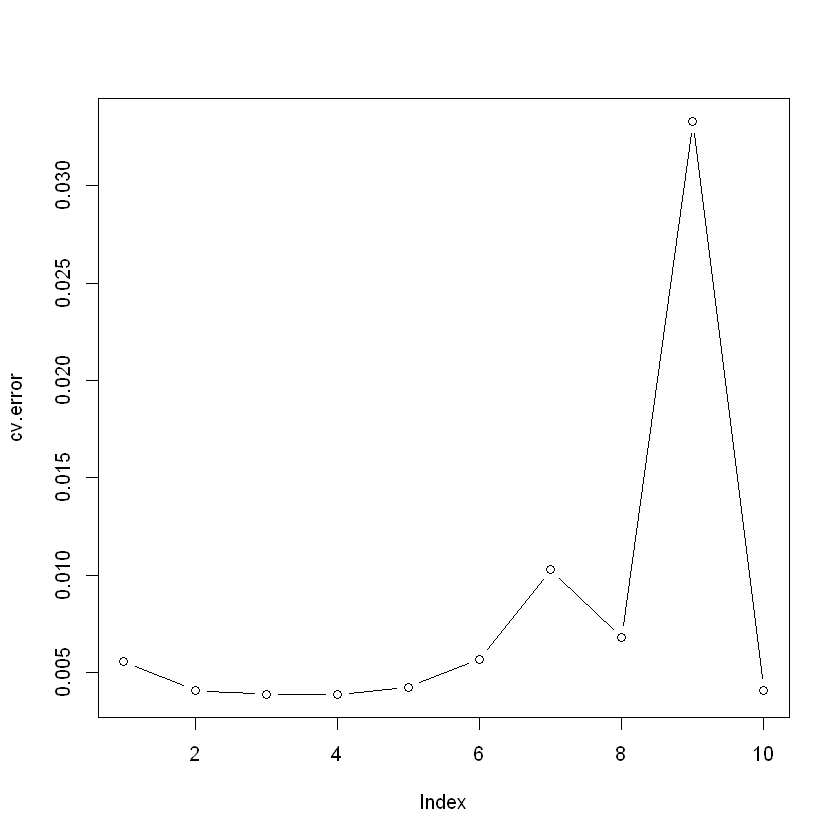

In [9]:
set.seed(1)
cv.error <- rep(0,10)
for (i in 1:10) {
  glm.fit <- glm(nox~poly(dis,i), data=Boston)
  cv.error[i] <- cv.glm(Boston, glm.fit, K=10)$delta[1]  # [1]:std, [2]:bias-corrected
}
cv.error
plot(cv.error, type="b")

# Exercise 10 - Chap 7 (Page 300)

#### 10.a

In [12]:
require(ISLR)
require("leaps")
data(College)
set.seed(1)

Loading required package: leaps
Warning message:
"package 'leaps' was built under R version 3.6.2"

In [13]:
# split data into train and test sets
trainid <- sample(1:nrow(College), nrow(College)/2)
train <- College[trainid,]
test <- College[-trainid,]

In [15]:
predict.regsubsets <- function(object, newdata, id, ...){
  form <- as.formula(object$call[[2]])
  mat <- model.matrix(form, newdata)
  coefi <- coef(object, id=id)
  xvars <- names(coefi)
  mat[,xvars]%*%coefi
}

Subset selection object
Call: regsubsets.formula(Outstate ~ ., data = train, nvmax = ncol(College) - 
    1)
17 Variables  (and intercept)
            Forced in Forced out
PrivateYes      FALSE      FALSE
Apps            FALSE      FALSE
Accept          FALSE      FALSE
Enroll          FALSE      FALSE
Top10perc       FALSE      FALSE
Top25perc       FALSE      FALSE
F.Undergrad     FALSE      FALSE
P.Undergrad     FALSE      FALSE
Room.Board      FALSE      FALSE
Books           FALSE      FALSE
Personal        FALSE      FALSE
PhD             FALSE      FALSE
Terminal        FALSE      FALSE
S.F.Ratio       FALSE      FALSE
perc.alumni     FALSE      FALSE
Expend          FALSE      FALSE
Grad.Rate       FALSE      FALSE
1 subsets of each size up to 17
Selection Algorithm: exhaustive
          PrivateYes Apps Accept Enroll Top10perc Top25perc F.Undergrad
1  ( 1 )  " "        " "  " "    " "    " "       " "       " "        
2  ( 1 )  " "        " "  " "    " "    " "       " "      

(Intercept)    PrivateYes    Room.Board      Terminal   perc.alumni 
-4726.8810613  2717.7019276     1.1032433    36.9990286    59.0863753 
       Expend     Grad.Rate 
    0.1930814    33.8303314

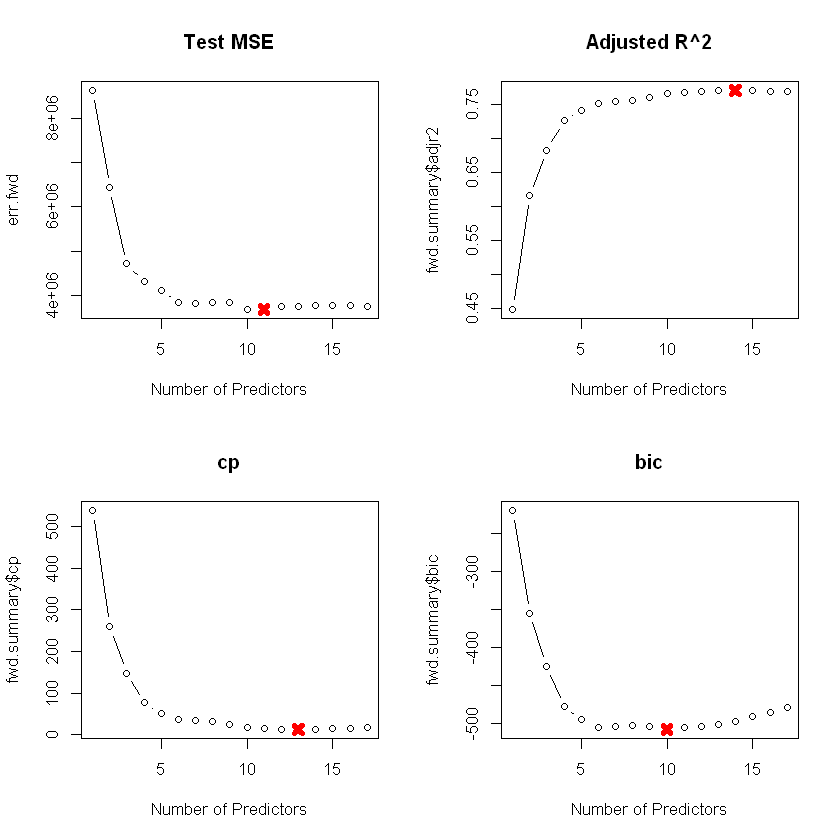

In [16]:
# forward selection
fit.fwd <- regsubsets(Outstate~., data=train, nvmax=ncol(College)-1)
(fwd.summary <- summary(fit.fwd))
err.fwd <- rep(NA, ncol(College)-1)
for(i in 1:(ncol(College)-1)) {
  pred.fwd <- predict(fit.fwd, test, id=i)
  err.fwd[i] <- mean((test$Outstate - pred.fwd)^2)
}
par(mfrow=c(2,2))
plot(err.fwd, type="b", main="Test MSE", xlab="Number of Predictors")
min.mse <- which.min(err.fwd)  
points(min.mse, err.fwd[min.mse], col="red", pch=4, lwd=5)
plot(fwd.summary$adjr2, type="b", main="Adjusted R^2", xlab="Number of Predictors")
max.adjr2 <- which.max(fwd.summary$adjr2)  
points(max.adjr2, fwd.summary$adjr2[max.adjr2], col="red", pch=4, lwd=5)
plot(fwd.summary$cp, type="b", main="cp", xlab="Number of Predictors")
min.cp <- which.min(fwd.summary$cp)  
points(min.cp, fwd.summary$cp[min.cp], col="red", pch=4, lwd=5)
plot(fwd.summary$bic, type="b", main="bic", xlab="Number of Predictors")
min.bic <- which.min(fwd.summary$bic)  
points(min.bic, fwd.summary$bic[min.bic], col="red", pch=4, lwd=5)

# after 6 predictors, the model metrics are steady
coef(fit.fwd, 6)

#### 10.b

In [19]:
install.packages("gam")
library(gam)

Installing package into 'C:/Users/abannem/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'gam' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abannem\AppData\Local\Temp\Rtmp0UWpJv\downloaded_packages


Warning message:
"package 'gam' was built under R version 3.6.2"Loading required package: splines
Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.6.2"Loaded gam 1.16.1



Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"

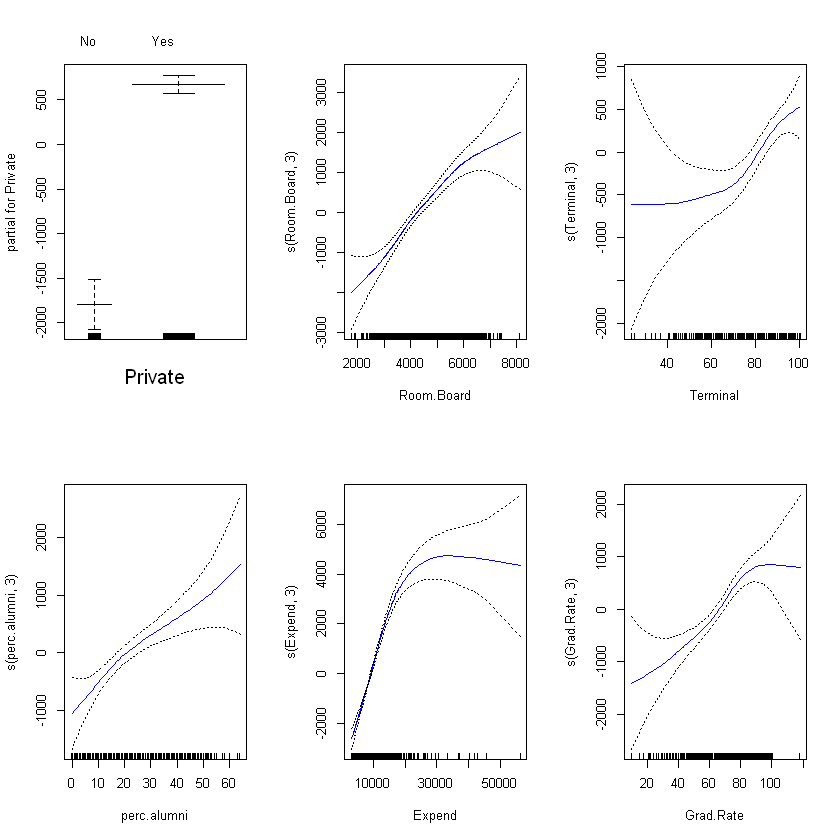

In [20]:
gam.fit <- gam(Outstate ~ 
                 Private +
                 s(Room.Board,3) + 
                 s(Terminal,3) + 
                 s(perc.alumni,3) + 
                 s(Expend,3) + 
                 s(Grad.Rate,3), 
               data=College)
par(mfrow=c(2,3))
plot(gam.fit, se=TRUE, col="blue")

#### 10.c

In [22]:
gam.pred = predict(gam.fit, test)
gam.err = mean((test$Outstate - gam.pred)^2)
gam.err

[1] 3141785

In [23]:
gam.tss = mean((test$Outstate - mean(test$Outstate))^2)
test.rss = 1 - gam.err/gam.tss
test.rss

[1] 0.780499

#### We can see that the R-squared of 0.78 using GAM with 6 predictors.

#### 10.d

In [24]:
summary(gam.fit)


Call: gam(formula = Outstate ~ Private + s(Room.Board, 3) + s(Terminal, 
    3) + s(perc.alumni, 3) + s(Expend, 3) + s(Grad.Rate, 3), 
    data = College)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-7110.16 -1137.02    50.44  1285.38  8278.86 

(Dispersion Parameter for gaussian family taken to be 3520187)

    Null Deviance: 12559297426 on 776 degrees of freedom
Residual Deviance: 2675342725 on 760.0001 degrees of freedom
AIC: 13936.36 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                   Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private             1 3366732308 3366732308 956.407 < 2.2e-16 ***
s(Room.Board, 3)    1 2549088628 2549088628 724.134 < 2.2e-16 ***
s(Terminal, 3)      1  802254341  802254341 227.901 < 2.2e-16 ***
s(perc.alumni, 3)   1  525154274  525154274 149.184 < 2.2e-16 ***
s(Expend, 3)        1 1022010841 1022010841 290.329 < 2.2e-16 ***
s(Grad.Rate, 3)     1  151344060  151344060  42.993 1.014e-10 ***
Re

#### Anova for Nonparametric Effects test shows a strong evidence of non-linear relationship between response and Expend, and a slight strong non-linear relationship between response and Grad